<a href="https://colab.research.google.com/github/dretcm/Deep-Learning-ACM/blob/main/Deep_Learning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Apropiar conceptos fundamentales de las redes neuronales

**todo el curso:** [lo encontre en un comentario muy bueno](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/blob/master/Notes/notes.md)

**Youtube:** [Buen video de 3Blue1Brown Español ](https://www.youtube.com/watch?v=jKCQsndqEGQ)

**Optimización Bayesiana:** [link de colab](https://colab.research.google.com/drive/1rr0nhaCO31A9FSbFR7B_FeufP7KXBc_E#scrollTo=ZWHTXvyi53pQ)

**Tipos de Red Neuronal:**
* DNN(Deep Neuronal Network): la NN que tiene 2 o más capas.
* CNN(Covolutional Neuronal Network): Esta se especializa en el procesamiento de imagenes y un poco en texto.
* RNN(Recurrent Neuronal Network): se usa para datos los cuales son secuenciales, texto, precios, etc. con el LSTM.

**Explicacion basica de una RN:** [link](https://vincentblog.xyz/posts/conceptos-basicos-sobre-redes-neuronales)

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/hiper_parametros_1.png) $2^n$ es el número mayor más cercano a 2$*$(features).

* Aumentar la cantidad de capas es necesariamente aumentar la complejidad y el tiempo necesario para el entrenamiento, en contraste nos da la posibilidad de que la red aprenda comportamientos muy complejos

* La recomendación es siempre comenzar con una pequeña arquitectura e ir incrementando paulatinamente la cantidad de capas, lo recomendable para el numero de neuronas de entrada máximo es usar la formula de $2^n$ e ir disminuyendo la cantidad de neuronas en las capas subsecuentes de la misma manera $2^{n-1}$

**Por que usar redes Neuronales:**

* Disponibilidad de datos para entrenar redes.

* Capacidad computacional a menor costo y con mayor disponibilidad.

* Mejores algoritmos de entrenamiento.

* Gran comunidad que constantemente comparte desarrollos, nuevas arquitecturas o nuevas aplicaciones.

* APIs flexibles, simples y gratuitos

**¿Qué es transfer learning?**

* cuando elegimos a una red neuronal para un trabajo similar al que hace, que opcion sería mejor para reconocer imagenes medicas, un red neuronal que ya se entreno para ver imagenes en general de todo(perros, gatos, carros, etc.) o una red recien creada que no tiene experiencia alguna. La respuesta es la RN que tenga ya experiencia con imagenes.

ejemplo: queremos que nos lleven en moto al centro, a quien elegiriamos a un niño que no sabe nada sobre conducción, o el joven que conduce bicicleta todos los días para entregar el pan.

**En las redes neuronales artificiales, ¿se declaran explícitamente las relaciones entre conjuntos de datos?**

* Falso, Una red neuronal consiste en una serie de algoritmos que se esfuerzan por reconocer las relaciones subyacentes en conjunto de datos a traves de un proceso que imita la forma en que opera el cerebro humano.

## **Construyendo un Perceptrón**

Aunque es común que usemos librerias y simplemente ingresemos parametros. Creo que vale mucho la pena entender a profundidad como está estructurado sino todo al menos algunas cosas desde adentro.


---



![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/400px-Perceptr%C3%B3n_5_unidades.svg.png)



---


En este caso quiero mostrarles como construir un Perceptrón de una capa desde cero.
Usaremos el concepto de clase para encapsular los atributos y métodos que queremos asignar a nuestro perceptrón simple.

In [ ]:
import numpy as np
class Perceptron:
    def __init__(self,X=None, y=None,lr=0.001, niter=1000):
        self.lr = lr
        self.niter = niter
        self.w = None
        self.b = None
    # modelo de ajuste fit
    def fit(self,X,y):
        samples,features = X.shape
        self.w = np.zeros(features)
        self.b = 0
        y_ = np.array([1 if i>0 else 0 for i in y])
        for _ in range(self.niter):
            for indice,X_i in enumerate(X):
                self.w += self.lr*(y_[indice]-self.predic(X_i))* X_i
      # método predict 
    def predic(self, X):
        y_hat = np.dot(X,self.w) + self.b
        y_hat =self.activate_fun(y_hat)
        return y_hat
      #agregamos una función de activación  basado en el modelo de perceptro
    def activate_fun(self,z):
        return np.where(z>0, 1,0)
      # agregamos un accuracy score 
    def score(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred)/len(y_true)
        return accuracy


**Comparando el perceptrón con el MLP - Iris**

Comparemos el comportamiento del perceptrón construidos con el MLP(Multilayer_perceptron), para el dataset **iris**

In [ ]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import  matplotlib.pyplot as plt

if __name__=="__main__":
    iris = load_iris() 
    X = iris.data
    y = iris.target


    # construyendo el train y test
    # hay que tener en cuenta la nomenclatura:
    # Setosa (0)
    # Versicolor (1)
    # Virginica (2)

    X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)
    # indicamos que clase queremos clasificar
    y_entrenamiento = (y_train==1).astype(np.int)
    y_testing = (y_test==1).astype(np.int)
    # entrenando el modelo
    p = Perceptron()
    p.fit(X_train,y_entrenamiento)
    prediccion = p.predic(X_test)
    accuracy = p.score(y_testing,prediccion)
    print('Simple Perceptron accuracy:', round(accuracy,3))

    # ================================================
    # iris multilayer
    #=================================================
    MLP=MLPClassifier(hidden_layer_sizes=(1000,), max_iter=500)
    MLP.fit(X_train,y_entrenamiento)
    predic = MLP.predict(X_test)
    accuracy_MLP = MLP.score(X_test,y_testing)
    print('MLP accuracy:', round(accuracy_MLP,4))


Simple Perceptron accuracy: 0.667
MLP accuracy: 0.9667


# DL with Keras and Scikit-learn

##<h1 id="perceptron">Perceptrón</h1>

Representación más simple de una neurona, su salida es de característica binaria (1, 0) y depende de una combinación lineal de las señales de entrada.


<h1 id="iris">Dataset IRIS</h1>

El Famoso set de datos [IRIS](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) contiene información de 3 diferentes especies (target):

* Iris-Setosa (0)
* Iris-Versicolor (1)
* Iris-Virginica (2)

El dataset contiene 150 muestras (50 por cada especie) y 4 características:

* Longitud del sepalo (cm)
* Ancho del sepalo (cm)
* Longitud del petalo (cm)
* Ancho del petalo (cm)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

In [ ]:
iris.target

In [ ]:
iris.data[:5, :]

In [ ]:
## Gráfiquemos dos variables: longitud y ancho del pétalo ##
data = iris.data[:, (2, 3)]
labels = iris.target

plt.figure(figsize=(13,6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor='face')
plt.xlabel('Longitud pétalo (cm)')
plt.ylabel('Ancho pétalo (cm)')
plt.show()

In [ ]:
## Longitud y ancho del petalo ##
X = iris.data[:, (2, 3)] 
## Es Iris Virginica?
y = (iris.target == 2).astype(np.int) 

test_perceptron = Perceptron()
test_perceptron.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y1_pred = test_perceptron.predict([[5.1, 2]])
y2_pred = test_perceptron.predict([[1.4, 0.2]])
print('Predicción 1:', y1_pred, 'Predicción 2:', y2_pred)

Predicción 1: [1] Predicción 2: [0]


El Perceptrón permite implementar clasificadores binarios muy simples, sin embargo a la hora de enfrentar problemas más complejos como la identificación de patrones se recurre a combinar múltiples perceptrones.

## <h1 id="mlp">Multi-layer Perceptron (MLP)</h1>

Una arquitectura de múltiples capas de perceptrones o MLP) es la respuesta a la necesidad de poder analizar problemas más complejos como lo es la clasificación de imágenes. A grandes rasgos y tal y como se muestra en la animación está compuesta por una capa de entrada, una o múltiples capas de TLUs denominadas capas ocultas cada una compuesta por diferentes perceptrones y una capa final denominada capa de salida. Cuando se incluyen más de dos capas ocultas se suele denominar red neuronal profunda (Deep Neural Network DNN)



### <h1 id="problema">Contexto analítico</h1>

Requerimos diseñar un modelo que permita determinar el precio medio de las viviendas en Boston, para ello contamos con un set de información disponible en Keras con características y precios de viviendas en diferentes ubicaciones de Boston de finales de 1970. (Mayor detalle disponible en http://lib.stat.cmu.edu/datasets/boston 

En total contamos con 506 muestras caracterizadas por 13 variables. 


 Variables | Description
 --- | ---
 CRIM   |  per capita crime rate by town
 ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS  |  proportion of non-retail business acres per town
 CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX    |  nitric oxides concentration (parts per 10 million)
 RM     |  average number of rooms per dwelling
 AGE    |  proportion of owner-occupied units built prior to 1940
 DIS    |  weighted distances to five Boston employment centres
 RAD    |  index of accessibility to radial highways
 TAX    |  full-value property-tax rate per \$10,000
 PTRATIO|  pupil-teacher ratio by town
 B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT  |  % lower status of the population
 MEDV   |  Median value of owner-occupied homes in $1000's

In [ ]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print("Tamaño set de entrenamiento:",x_train.shape)
print("Tamaño set de prueba:",x_test.shape)

Tamaño set de entrenamiento: (404, 13)
Tamaño set de prueba: (102, 13)


In [ ]:
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

#Definición de la arquitectura
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
model.add(Dense(6, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


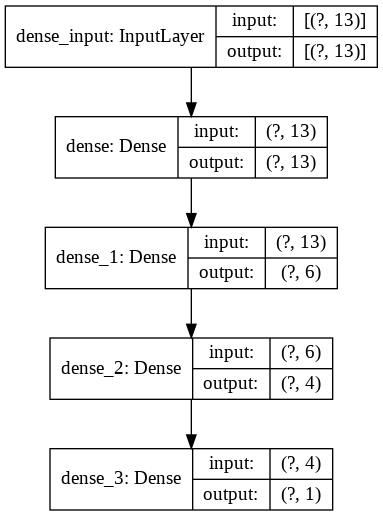

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

### <h1 id="keras">Entrenamiento y Evaluación del modelo</h1>

Ahora realizaremos diferentes entrenamientos de la red neuronal diseña y evaluaremos su desempeño.

In [ ]:
#Entrena el modelo
x_val = x_train[300:,]
y_val = y_train[300:,]
#Entrena el modelo
model.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
13/13 [==============================] - 0s 15ms/step - loss: 589.0016 - mean_absolute_percentage_error: 99.8426 - val_loss: 533.6537 - val_mean_absolute_percentage_error: 99.5929
Epoch 2/5
13/13 [==============================] - 0s 3ms/step - loss: 583.8458 - mean_absolute_percentage_error: 99.2407 - val_loss: 526.0100 - val_mean_absolute_percentage_error: 98.6090
Epoch 3/5
13/13 [==============================] - 0s 3ms/step - loss: 571.1353 - mean_absolute_percentage_error: 97.6716 - val_loss: 506.0570 - val_mean_absolute_percentage_error: 95.8349
Epoch 4/5
13/13 [==============================] - 0s 3ms/step - loss: 536.3995 - mean_absolute_percentage_error: 93.1283 - val_loss: 450.8304 - val_mean_absolute_percentage_error: 87.5798
Epoch 5/5
13/13 [==============================] - 0s 3ms/step - loss: 444.9887 - mean_absolute_percentage_error: 80.1858 - val_loss: 321.8651 - val_mean_absolute_percentage_error: 66.6681


In [ ]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 2ms/step - loss: 356.1848 - mean_absolute_percentage_error: 68.3216
loss  :  356.184814453125
mean_absolute_percentage_error  :  68.32160186767578


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_val,y_val))

Epoch 1/200
13/13 [==============================] - 0s 5ms/step - loss: 11.5163 - mean_absolute_percentage_error: 12.7526 - val_loss: 15.5811 - val_mean_absolute_percentage_error: 17.2635
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 12.3709 - mean_absolute_percentage_error: 12.8833 - val_loss: 11.6535 - val_mean_absolute_percentage_error: 13.6030
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 11.5601 - mean_absolute_percentage_error: 12.6122 - val_loss: 12.6083 - val_mean_absolute_percentage_error: 15.4259
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 12.2503 - mean_absolute_percentage_error: 12.7498 - val_loss: 14.5000 - val_mean_absolute_percentage_error: 16.2652
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 12.8725 - mean_absolute_percentage_error: 13.0008 - val_loss: 13.4210 - val_mean_absolute_percentage_error: 16.0870
Epoch 6/200
13/13 [==============================] - 0s

In [ ]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 2ms/step - loss: 33.8687 - mean_absolute_percentage_error: 15.4814
loss  :  33.868709564208984
mean_absolute_percentage_error  :  15.481425285339355


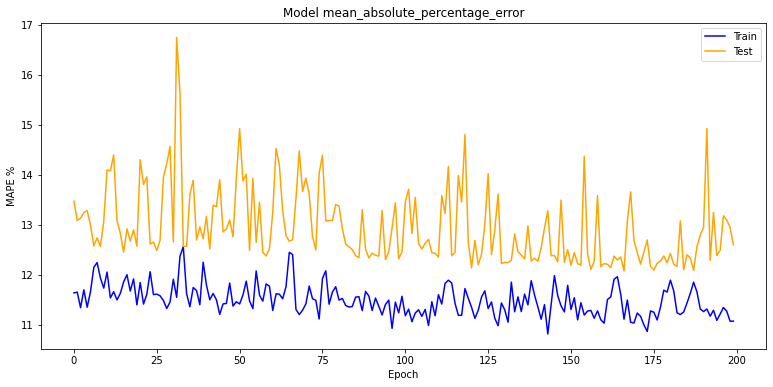

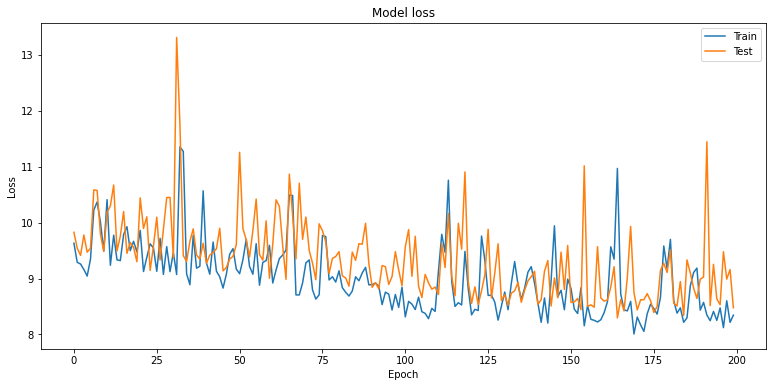

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_val,y_val), verbose=0)
# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'],c='blue')
plt.plot(history.history['val_mean_absolute_percentage_error'],c='orange')
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**Importante:** Como vemos la perdida de la set de validation es mayor a la de entrenamiento, esta claro que estamos en un problema de overfitting, espera QUE!, retrocedamos un poco, la data de validacion se saco de la data de entrenamiento así que no es un problema de overfitting, sino de underfitting, porque nuestro modelo no es capaz de generalizar la misma data de entrenamiento y mucho menos al momento de generalizar con una nueva data o con la data test.

En el curso de ML en coursera Andrew Ng en realidad dice que agregando mas datos no solucionara el underfitting(si lo hace con overfitting), por el contrario lo que se debe hacer es:

* Aumentar el numero de features
* Aumentar la complejidad de tu modelo, por ejemplo usar una regresion polinomica en vez de una lineal
* Si usas regularizacion disminuir el valor del parametro alpha o lambda
* En el caso de redes neuronales, agregar mas capas “ajusta” mas tu modelo, por lo que seria tambien una buena opcion

**Recordar:** que habra un parametro optimo para los EPOCH, como se vio al aumentar los EPOCH disminuyo nuestro valor de perdida, pero tambien puede pasar que al aumentar demasiado nuestro EPOCH pueda aumentar nuestro valor de perdida.

###<h1 id="backward">Backward Propagation</h1>

La propagación hacia atrás o backpropagation es un algoritmo de entrenamiento de redes neuronales. El método consiste en un ciclo de propagación y adaptación en dos fases. Primero se aplica un estímulo a la entrada de la red que se propaga por todas las capas hasta generar una salida. Luego la señal de salida se compara con la salida deseada y se calcula el error para cada una de las salidas. Enseguida, el error calculado se propaga hacia atrás partiendo desde la capa de salida hasta la capa de entrada de tal manera que todas las neuronas reciben una retroalimentación respecto a su contribución relativa al error. 


####**Algoritmo Backward propagation**

* Se procesa un mini-lote de información a la vez. Cada paso de la información por la red se denomina época. 
*  Cada mini-batch de información es pasado por la capa de entrada la cual lo envía a la primera capa oculta. 
*  Luego se procesa la salida de todas las neuronas en esta capa (por cada muestra en el batch) 
*  El resultado se pasa a la siguiente capa y así sucesivamente hasta la capa de salida. Hasta ahora el proceso es el mismo que forward pass, todos los resultados intermedios son almacenados hasta que son necesitados por el paso de backward.
*  Enseguida el algoritmo mide el error en la salida mediante funciones de pérdidas y retorna la medida del error.
*  Luego se calcula la contribución en el error de conexión correspondiente con la capa anterior aplicando la regla de la cadena, fundamental en el cálculo. Este proceso se reitera hasta la capa de entrada.
*  En efecto el algoritmo propaga el gradiente del error a todos los pesos correspondientes de las conexiones en la red.
*  Finalmente se ejecuta un gradiente descendente para ajustar todos los pesos sinápticos en la red empleando los gradientes de error.


# Funciones(Activation and Loss)

## Funciones de activación

La razón de por qué se usa una función de activación. Generalmente se hace para lograr agregar el factor de “no linearidad” que se necesita, para atacar ciertos problemas, donde no se puede usar simplemente una frontera de decisión lineal(hiperplano) que nos separe los puntos, esto para un problema de clasificación. Luego usar estas funciones nos permite encontrar regiones o fronteras no lineales que separen mejor los puntos.

![XD](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

## Funciones de costo o pérdidas

La función de perdida al igual que la función de activación depende de la naturaleza del problema a resolver. La siguiente es una selección común encontrada en la literatura:

* Para un problema de regresión la función de perdida es MSE

* Para un problema de clasificación binaria la función de perdida favorita es BCE(Binary Cross Entropy)

* Para un problema de categorización, la función de perdida más usada es CCE(Categorical Cross-Entropy.)

* Para un problema de clasificación multiclase, la función de perdida más usada es NLL (Negative Log-likehood).

Estas funciones de costo se usan para problemas de regresion, es decir, con variables continuas.

MAE es más robusta a outliders o ruido que MSR, ya que el error medio con ruido elevado al cuadrado es muy grande y eso podria distorcionar nuestro modelo.

en el caso del mean absolute error, su gran desventaja, la cual radica en que su “derivada” tiene problemas muy cerca a cero, lo cual es poco conveniente ya que en las iteraciones, el conocido “back propagation” hace uso de dichas derivadas.

**Mean Absolute Percentage Error**

Utiliza las distancias entre la muestras y la recta pero se escala con el valor real para obtener el valor porcentual, No esta definido cuando los valores sean cero, Penaliza el modelo cuando existen errores grandes, y es robusto frente a los outliers por el uso del valor absoluto.

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/funcion_mean_absolute_percentage_error.png)

# Inicialización y Entrenamiento de RN

## Inicializadores disponibles en Keras:

**MINST classification:**
(Inicialización por defectuo en keras)
1. Dense: glorot_uniform
2. LSTM: glorot_uniform
3. CNN: glorot_uniform

**ALGORITMO DE ENTRENAMIENTO:**

![link text](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/descenso_gradiente.png)
![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/limitaciones_gradiente.png)

## Optimizadores
* como vimos en el "Descenso del Gradiente", podemos encontrarnos con el problema de quedarnos en un mino local, o nunca encontrar el minimo global, ir muy lento, etc. Para solucionar los optimizadores nos proporcionaran metodos los cuales quitaran las limitaciones anteriores.

**Adam**
* Es una combinacion de AdaGrad(varianza de la taza de aprendisaje) y Momentum.

![link text](https://rnrahman.com/img/visualising-optim/saddle.gif)


**Recordando que los optimizadores nos permitiran modificar el "Learning Rate" y haci liberarnos de ciertos problemas con el "Descenso del Gradiente".**

#Clasificación Binaria

Como aporte, algunos ingenieros de datos recomiendan no eliminar las columnas con un alto valor de datos Nan sino imputar su argumento con el valor None. Esto para no eliminar caracteristicas y darles luego un Label Encoding. Esto es recomendable sobre todo si el dataset de prueba también contiene información nula.

Ahora si los valores nulos solo se encuetran en el dataset de training y no su alcance no afecta para nada el problema, ahí sí se recomienda eliminar la caracteristica.

##<h1 id="problema">Contexto analítico</h1>

Este caso se basa en un reto propuesto por Red Hat en la plataforma Kaggle. (https://www.kaggle.com/c/predicting-red-hat-business-value/data) 

Red Hat es capaz de obtener una importante cantidad de información de comportamiento de sus clientes. El interes de la compañia se basa en la busqueda de mejores metodos para analizar sus clientes para predecir sobre cuales deberian hacer un especial enfasis que podrian convertirse en clientes de alto valor.

En este reto se propone crear un algoritmo de clasificación que identifique los clientes con mayor potencial para convertirse en clientes de alto valor para Red Hat basados en su actividad.

Se cuenta con dos datasets (people.csv y act_train.csv) los cuales cargaremos directamente a Colab.

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import io
from google.colab import files #Librería necesaria para interactuar con archivos en Colab

In [ ]:
from google.colab import drive
people = drive.mount('/content/drive')
path_people = '/content/drive/My Drive/data/people.csv'

Mounted at /content/drive


In [ ]:
people = pd.read_csv(path_people,sep=',')
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


El primer hecho a resaltar es que la información se presenta anonimizada, algo muy común en la ciencia de datos. 

Se aprecia una gran cantidad de campos de naturaleza categórica. 

In [ ]:
path_act_train = '/content/drive/My Drive/data/act_train.csv'
activity = pd.read_csv(path_act_train, sep=',')
activity.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


## <h1 id="ingenieria">Ingeniería de datos</h1>

Evaluaremos ahora el tamaño de los datasets y la completitud de información en las distintas variables disponibles.

In [ ]:
print(people.shape)
100*people.isnull().sum()/people.shape[0]

(189118, 41)


people_id    0.0
char_1       0.0
group_1      0.0
char_2       0.0
date         0.0
char_3       0.0
char_4       0.0
char_5       0.0
char_6       0.0
char_7       0.0
char_8       0.0
char_9       0.0
char_10      0.0
char_11      0.0
char_12      0.0
char_13      0.0
char_14      0.0
char_15      0.0
char_16      0.0
char_17      0.0
char_18      0.0
char_19      0.0
char_20      0.0
char_21      0.0
char_22      0.0
char_23      0.0
char_24      0.0
char_25      0.0
char_26      0.0
char_27      0.0
char_28      0.0
char_29      0.0
char_30      0.0
char_31      0.0
char_32      0.0
char_33      0.0
char_34      0.0
char_35      0.0
char_36      0.0
char_37      0.0
char_38      0.0
dtype: float64

In [ ]:
#Repetimos el procedimiento con el dataset de activity
print(activity.shape)
100*activity.isnull().sum()/activity.shape[0]   # lo dividimos por el total para ver el porcentaje 

(2197291, 15)


people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               92.826849
char_2               92.826849
char_3               92.826849
char_4               92.826849
char_5               92.826849
char_6               92.826849
char_7               92.826849
char_8               92.826849
char_9               92.826849
char_10               7.173151
outcome               0.000000
dtype: float64

Se evidencia que los campos char_1 al char_9 tienen el 92% de sus valores en nulo Esta cantidad es muy elevada para aplicar metodos de imputación, por lo cual optaremos por elminar las columnas con este inconveniente.

In [ ]:
activity.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [ ]:
# activity.drop(columns=['char_1','char_2', 'char_3', 'char_4', 'char_5', 'char_6',\
#                        'char_7', 'char_8','char_9'],inplace=True)
activity.drop(columns= activity.iloc[:, 4:13], inplace=True)
print(activity.shape)
activity.head(3)

(2197291, 6)


,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0


Para consolidar un dataset debemos tener un par de consideraciones previas: 

* Se aprecia que existen dos variables que tienen los mismos nombres en ambos 
datasets (char_2 y char_10) por lo cual es buena practica renombrar estas columnas para evitar confusiones al momento de unificar las fuentes.
* En el caso de la variable categórica "tipo_actividad" existe una proporción de nulos que podemos reemplazar por el valor más frecuente o la moda.



In [ ]:
# Renombramos columnas
activity = activity.rename(columns={"date":"fecha_actividad","char_10":"tipo_actividad"})
# Reenplazamos el tipo de actividad por la moda 
# activity["tipo_actividad"] = activity["tipo_actividad"].fillna(activity["tipo_actividad"].mode()[0])
activity["tipo_actividad"].fillna(activity["tipo_actividad"].mode()[0], inplace=True)

# Verificamos el cambio
100*activity.isnull().sum()/activity.shape[0]

people_id            0.0
activity_id          0.0
fecha_actividad      0.0
activity_category    0.0
tipo_actividad       0.0
outcome              0.0
dtype: float64

Ahora unificamos los datasets empleando la función merge y evaluamos la consistencia luego de esta operación 

In [ ]:
consolidado = activity.merge(people,on=["people_id"],how="inner") # (data_Set, variable_comun, como_lo_hace)
print("Tamaño previo: ",activity.shape)
print("Nuevo tamaño: ",consolidado.shape)

Tamaño previo:  (2197291, 6)
Nuevo tamaño:  (2197291, 46)


La variable objetivo que clasifica la actividad de los usuarios como potenciales clientes es denominada "outcome", evaluaremos la distribución de este variable: 

In [ ]:
print("Distribución de outcome: \n", 100*consolidado["outcome"].value_counts()/consolidado.shape[0])

Distribución de outcome: 
 0    55.60456
1    44.39544
Name: outcome, dtype: float64


Como lo hemos mencionado, las redes neuronales requieren de entrada sólo valores numericos, por lo cual debemos convertir aquellas que no lo son. El dataset consolidado cuenta con 46 variables de tipo booleanas, numericas o categóricas que deben ser transformadas.

In [ ]:
types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables",types.groupby(0).size())  # grouby columnas

consolidado = consolidado.replace({False: 0, True: 1})

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de reemplazo",types.groupby(0).size())

Tipos de variables 0
bool      28
int64      2
object    16
dtype: int64
Tipos de variables luego de reemplazo 0
int64     30
object    16
dtype: int64


Si recordamos, el identificador people_id se compone por un prefijo "ppl_" seguido de un número único por usuario.En este caso basta con recortar el prefijo para transformar esta variable en numerica.

In [ ]:
consolidado.people_id = consolidado.people_id.str.slice(start=4).astype(float).astype(int)

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de 2do reemplazo",types.groupby(0).size())

Tipos de variables luego de 2do reemplazo 0
int64     31
object    15
dtype: int64


Al validar el dataset consolidado podemos aplicar la misma metodología previamente mencionada a otro par de columnas: 

"activity_id", "activity_category", "group_1", "tipo_actividad"

In [ ]:
consolidado[["activity_id", "activity_category", "group_1", "tipo_actividad"]].head(3)

,activity_id,activity_category,group_1,tipo_actividad
0,act2_1734928,type 4,group 17304,type 76
1,act2_2434093,type 2,group 17304,type 1
2,act2_3404049,type 2,group 17304,type 1


In [ ]:
consolidado.activity_id = consolidado.activity_id.str.slice(start=5).astype(float).astype(int)
consolidado.activity_category = consolidado.activity_category.str.slice(start=5).astype(float).astype(int)
consolidado.group_1 = consolidado.group_1.str.slice(start=6).astype(float).astype(int)
consolidado.tipo_actividad = consolidado.tipo_actividad.str.slice(start=5).astype(float).astype(int)

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de 3er reemplazo",types.groupby(0).size())

Tipos de variables luego de 3er reemplazo 0
int64     35
object    11
dtype: int64


Evaluemos las variables que siguen tipo object y la cantidad de valores distintos que poseen

In [ ]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(consolidado[line].unique()))+" distinct values")

La variable fecha_actividad contiene: 411 distinct values
La variable char_1 contiene: 2 distinct values
La variable char_2 contiene: 3 distinct values
La variable date contiene: 1196 distinct values
La variable char_3 contiene: 43 distinct values
La variable char_4 contiene: 25 distinct values
La variable char_5 contiene: 9 distinct values
La variable char_6 contiene: 7 distinct values
La variable char_7 contiene: 25 distinct values
La variable char_8 contiene: 8 distinct values
La variable char_9 contiene: 9 distinct values


Del listado anterior resaltamos dos variables tipo fecha ("date", "fecha_actividad") Para la red neuronal representa una oportunidad poder extraer una serie de caracteristicas adicionales que le permitan entender patrones estacionales de diferentes periodicidades (diario, semanal, mensual, etc) es por esto que crearemos una serie de variables adicionales (de naturaleza numérica) a partir de estas dos fechas:

In [ ]:
#Convertimos la variable objeto en datetime
consolidado["date"] = pd.to_datetime(consolidado["date"])
#Creamos nuevas variables
consolidado["dia"] = consolidado["date"].dt.day
consolidado["dia_semana"] = consolidado["date"].dt.weekday
consolidado["semana"] = consolidado["date"].dt.week
consolidado["mes"] = consolidado["date"].dt.month
consolidado["trimestre"] = consolidado["date"].dt.quarter
consolidado["año"] = consolidado["date"].dt.year

#Repetimos el procedimiento anterior con fecha_actividad
consolidado["fecha_actividad"] = pd.to_datetime(consolidado["fecha_actividad"])
consolidado["dia_actividad"] = consolidado["fecha_actividad"].dt.day
consolidado["dia_semana_actividad"] = consolidado["fecha_actividad"].dt.weekday
consolidado["semana_actividad"] = consolidado["fecha_actividad"].dt.week
consolidado["mes_actividad"] = consolidado["fecha_actividad"].dt.month
consolidado["trimestre_actividad"] = consolidado["fecha_actividad"].dt.quarter
consolidado["año_actividad"] = consolidado["fecha_actividad"].dt.year

#Delete the original date columns
del(consolidado["date"])
del(consolidado["fecha_actividad"])

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de 4to reemplazo",types.groupby(0).size())

Tipos de variables luego de 4to reemplazo 0
int64     47
object     9
dtype: int64


In [ ]:
consolidado.head(15)

,people_id,activity_id,activity_category,tipo_actividad,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,dia,dia_semana,semana,mes,trimestre,año,dia_actividad,dia_semana_actividad,semana_actividad,mes_actividad,trimestre_actividad,año_actividad
0,100,1734928,4,76,0,type 2,17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,29,1,26,6,2,2021,26,5,34,8,3,2023
1,100,2434093,2,1,0,type 2,17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,29,1,26,6,2,2021,27,1,39,9,3,2022
2,100,3404049,2,1,0,type 2,17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,29,1,26,6,2,2021,27,1,39,9,3,2022
3,100,3651215,2,1,0,type 2,17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,29,1,26,6,2,2021,4,4,31,8,3,2023
4,100,4109017,2,1,0,type 2,17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,29,1,26,6,2,2021,26,5,34,8,3,2023
5,100,898576,4,1727,0,type 2,17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,29,1,26,6,2,2021,4,4,31,8,3,2023
6,100002,1233489,2,1,1,type 2,8688,type 3,type 28,type 9,type 5,type 3,type 11,type 2,type 4,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,76,6,2,1,1,1,2021,23,2,47,11,4,2022
7,100002,1623405,2,1,1,type 2,8688,type 3,type 28,type 9,type 5,type 3,type 11,type 2,type 4,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,76,6,2,1,1,1,2021,23,2,47,11,4,2022
8,100003,1111598,2,1,1,type 2,33592,type 3,type 4,type 8,type 5,type 2,type 5,type 2,type 2,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,99,10,4,23,6,2,2022,7,1,6,2,1,2023
9,100003,1177453,2,1,1,type 2,33592,type 3,type 4,type 8,type 5,type 2,type 5,type 2,type 2,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,99,10,4,23,6,2,2022,28,2,26,6,2,2023


Con la relativa pequeña cantidad de variables categoricas que manejamos vamos a proceder a realizar la conversión por One Hot Encoding

In [ ]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(consolidado[line].unique()))+" distinct values")

La variable char_1 contiene: 2 distinct values
La variable char_2 contiene: 3 distinct values
La variable char_3 contiene: 43 distinct values
La variable char_4 contiene: 25 distinct values
La variable char_5 contiene: 9 distinct values
La variable char_6 contiene: 7 distinct values
La variable char_7 contiene: 25 distinct values
La variable char_8 contiene: 8 distinct values
La variable char_9 contiene: 9 distinct values


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

columna='char_6'
le = LabelEncoder()
le_ajustado=le.fit_transform(consolidado[columna]).reshape(-1,1)
le_ajustado[:10]

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1]])

In [ ]:
aea = set([int(x) for x in le_ajustado])
aea

{-1, 0, 1, 2, 3, 4, 5, 6}

In [ ]:
encoder = OneHotEncoder(sparse=False)
column = [columna+ "_"+ str(i) for i in le.classes_]
column

['char_6_type 1',
 'char_6_type 2',
 'char_6_type 3',
 'char_6_type 4',
 'char_6_type 5',
 'char_6_type 6',
 'char_6_type 7']

In [ ]:
pd.DataFrame(encoder.fit_transform(le_ajustado),columns =column).head(10)

,char_6_type 1,char_6_type 2,char_6_type 3,char_6_type 4,char_6_type 5,char_6_type 6,char_6_type 7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Se define función que captura el dataframe y la columna para retornar un dataframe luego de OHE
def crea_OneHotEncoding(df, columna):
  le = LabelEncoder()
  le_ajustado=le.fit_transform(df[columna]).reshape(-1,1)
  encoder = OneHotEncoder(sparse=False)
  column = [columna+ "_"+ str(i) for i in le.classes_]
  data = encoder.fit_transform(le_ajustado)
  return(pd.DataFrame(data,columns =column))

In [ ]:
numeric_columns = list(set(types.index[types[0] =="int64"].values) - set(["outcome"]))
variables_consolidadas = consolidado[numeric_columns]
objetivo = consolidado["outcome"]

categoricas = types.index[types[0] == 'O'].values
for column in categoricas:
  df = crea_OneHotEncoding(consolidado,column)
  variables_consolidadas = pd.concat([variables_consolidadas,df],axis=1)
  print("Columna ",column, " transformada!")

print("Tamaño final del dataset transformado:",variables_consolidadas.shape)

Columna  char_1  transformada!
Columna  char_2  transformada!
Columna  char_3  transformada!
Columna  char_4  transformada!
Columna  char_5  transformada!
Columna  char_6  transformada!
Columna  char_7  transformada!
Columna  char_8  transformada!
Columna  char_9  transformada!
Tamaño final del dataset transformado: (2197291, 177)


In [ ]:
variables_consolidadas.head(3)

,char_19,char_30,mes,char_34,char_14,char_13,char_27,año,trimestre,char_24,dia,char_29,char_37,char_15,char_20,group_1,char_26,tipo_actividad,char_36,char_11,char_33,char_12,char_32,semana_actividad,char_31,char_16,char_25,dia_actividad,año_actividad,trimestre_actividad,char_38,char_22,char_21,char_17,activity_id,mes_actividad,char_28,char_35,char_10,dia_semana_actividad,...,char_7_type 11,char_7_type 12,char_7_type 13,char_7_type 14,char_7_type 15,char_7_type 16,char_7_type 17,char_7_type 18,char_7_type 19,char_7_type 2,char_7_type 20,char_7_type 21,char_7_type 22,char_7_type 23,char_7_type 24,char_7_type 25,char_7_type 3,char_7_type 4,char_7_type 5,char_7_type 6,char_7_type 7,char_7_type 8,char_7_type 9,char_8_type 1,char_8_type 2,char_8_type 3,char_8_type 4,char_8_type 5,char_8_type 6,char_8_type 7,char_8_type 8,char_9_type 1,char_9_type 2,char_9_type 3,char_9_type 4,char_9_type 5,char_9_type 6,char_9_type 7,char_9_type 8,char_9_type 9
0,0,1,6,1,1,1,1,2021,2,0,29,0,0,0,0,17304,0,76,1,0,0,0,0,34,1,1,0,26,2023,3,36,0,1,0,1734928,8,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,6,1,1,1,1,2021,2,0,29,0,0,0,0,17304,0,1,1,0,0,0,0,39,1,1,0,27,2022,3,36,0,1,0,2434093,9,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,6,1,1,1,1,2021,2,0,29,0,0,0,0,17304,0,1,1,0,0,0,0,39,1,1,0,27,2022,3,36,0,1,0,3404049,9,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Con el dataset ya consolidado procedemos a seleccionar las muestras de entrenamiento, validación y prueba

In [ ]:
from sklearn.model_selection import train_test_split
#Entrenamiento y prueba con relación 80:20
x_train, x_test, y_train, y_test = train_test_split(variables_consolidadas,objetivo, test_size=0.2,random_state=2020)
#Entrenamiento y validación con relación 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=2020)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (1582048, 177)
Shape of x_test: (439459, 177)
Shape of x_val: (175784, 177)
Shape of y_train: (1582048,)
Shape of y_test: (439459,)
Shape of y_val: (175784,)


## Métricas de desempeño: regresión y clasificación

![](https://i.pinimg.com/originals/1a/cb/1d/1acb1df700729f70a15a6ed198451645.jpg)


**METRICAS DE DESEMPEÑO:**
```
Accuracy = VP + VN / (VP + VN +FN + FP)

precision = VP / (VP + FP )

Recall = VP / (VP + FN)
```

En cosine proximity muchos se preguntaran porque coseno y no seno a pesar de que ambos van de -1 a 1( -1<=cos(x)<=1,-1<=sen(x)<=1), esto seria mucho mejor verlo en la grafica de la funcion coseno.Se podran fijar que de 0° a 180°(pi) mientras el angulo disminuye el coseno aumenta, es decir, mientras mas cercanos o mas parecidos sean los vectores mayor sera el coseno y mayor sera tu accuracy.Esto hace del CP una buena metrica de desempeño.
Por cierto la formula sale de esto:
A.B = cos(x)|A||B|, es del producto punto de dos vectores.

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/proximidad_coseno.png)

## <h1 id="arquitectura">Arquitectura Propuesta</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Debido a que el problema consiste en un clasificador binario la función de perdidas más recomendada es "binary_crossentropy".
* De manera similar una función de activación que se adecua al tipo de problema es la "sigmoid".
* La metrica para evaluación sera la precisión "accuracy"
* Debido a la gran cantidad de información el entrenamiento tomara más tiempo, en este escenario se implementaran arquitecturas más pequeñas con pocas epocas de entrenamiento y se escalará el modelo a medida los resultados del accuracy mejoren.

Es porque en la capa de entrada, se ajustan las neuronas a la potencia de dos mas cercana.

Por ejemplo:

2^7 = 128 (queda por debajo de 177)

2^8 = 256 (queda por arriba de 177 por lo que es perfecto)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Red neuronal pequeña
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) 
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

print(model.summary())

NameError: ignored

In [ ]:
plot_model(model, to_file='model.png',show_shapes=True)

NameError: ignored

In [ ]:
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)

NameError: ignored

In [ ]:
#Red neuronal de 2 capas
model = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 130s 82us/step - loss: 7.1558 - acc: 0.5560 - val_loss: 7.1357 - val_acc: 0.5573
Epoch 2/3
1582048/1582048 [==============================] - 129s 82us/step - loss: 7.1552 - acc: 0.5561 - val_loss: 7.1357 - val_acc: 0.5573
Epoch 3/3
1582048/1582048 [==============================] - 130s 82us/step - loss: 7.1552 - acc: 0.5561 - val_loss: 7.1357 - val_acc: 0.5573


A pesar de haber escalado el tamaño de la red los resultados siguen siendo descepcionantes. En este caso el mejor paso a seguir es volver a validar los datos disponibles. En este punto existen dos opciones a explorar: 
* Estandarizar las variables numericas disponibles.
* Volver a realizar el One Hot Encoding.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Red neuronal de 2 capas
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 132s 83us/step - loss: 0.1988 - acc: 0.9122 - val_loss: 0.1405 - val_acc: 0.9411
Epoch 2/3
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.1194 - acc: 0.9515 - val_loss: 0.1106 - val_acc: 0.9561
Epoch 3/3
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.0929 - acc: 0.9634 - val_loss: 0.0933 - val_acc: 0.9650


Con sólo la estandarización de la información el desempeño del modelo ha mejorado drasticamente logrando una precision del 96%! Podriamos seguir evaluanto redes más grandes, pero es un valor aceptable para nosotros por el momento. El siguiente paso es probar este mismo modelo con información que la red nunca haya visto (set de prueba)

In [ ]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",
str(round(result[i],2)))

439459/439459 [==============================] - 21s 48us/step
Metric  loss : 0.09
Metric  acc : 0.96


El desempeño con el set de prueba sigue siendo bueno por lo cual ya podemos emplear la arquitectura definida y realizar un entrenamiento con un mayor número de epocas.

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=12, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/12
1582048/1582048 [==============================] - 131s 83us/step - loss: 0.1972 - acc: 0.9129 - val_loss: 0.1430 - val_acc: 0.9409
Epoch 2/12
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.1188 - acc: 0.9518 - val_loss: 0.1088 - val_acc: 0.9571
Epoch 3/12
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.0927 - acc: 0.9636 - val_loss: 0.0898 - val_acc: 0.9652
Epoch 4/12
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.0780 - acc: 0.9697 - val_loss: 0.0831 - val_acc: 0.9688
Epoch 5/12
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.0689 - acc: 0.9735 - val_loss: 0.0781 - val_acc: 0.9717
Epoch 6/12
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.0624 - acc: 0.9766 - val_loss: 0.0746 - val_acc: 0.9737
Epoch 7/12
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.05

## <h1 id="evaluacion">Evaluación del modelo</h1>

La red ha logrado mejorar un poco su desempeño con más epocas de entrenamiento. Finalmente vamos a evaluar gráficamente el desempeño de la función de pérdidas y la presición a traves de cada época de entrenamiento con el fin de validar algun posible sobre-entrenamiento.

In [ ]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

439459/439459 [==============================] - 20s 47us/step
Metric  loss : 0.07
Metric  acc : 0.98


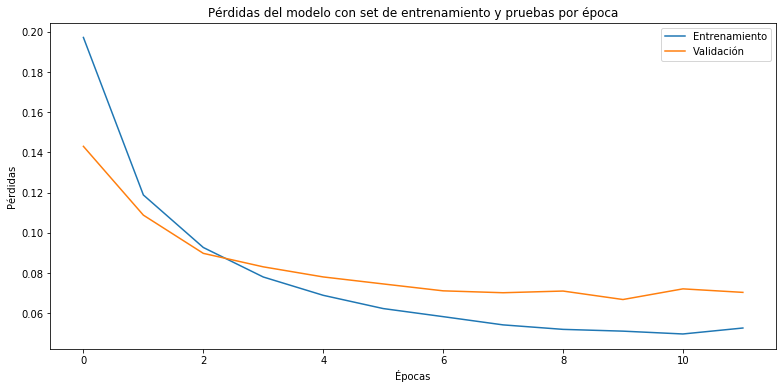

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

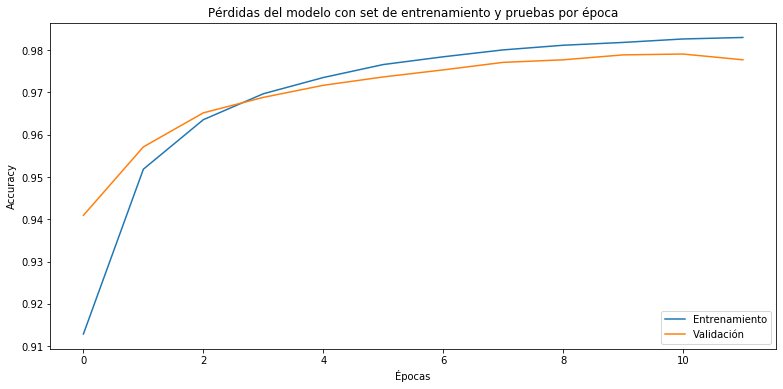

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

# Regularización

## Hiperparametros

* Batch size = Es una porcion de nuestro set de datos de entrenamiento el cual se propagara por toda la red en una iteracion, si por ejemplo tenemos 1000 datos de training podemos usar un batch de 32 datos, entonces primero se propagan 32, luego otros 32 y asi.Ojo iteracion no es lo mismo que epoch.

* Epoch = Son las veces que todo nuestro set de datos pasan por nuestra red neuronal, por ejemplo una vez que nuestros 1000 datos pasaron o se propagaron por nuestra red eso se considera 1 epoch.

* Kernel_initializer = Son los pesos iniciales que usaremos, en keras el default kernel_initializer es glorot_uniform.

* Optimizador = Es una forma de optimizar o acelerar el hallazgo de las derivadas parciales o gradientes en nuestra funcion de coste, el mas usado es Adam.

* Funcion de activacion: Se eligen dependiendo si es un problema de clasificacion (Sigmoid, ReLu,Tanh,Heaviside,etc) o de regresion(Linear regression,Ridge Regression,Lasso Regression,Isotonic Regression,etc).

* Cantidad de capas y neuronas por capa:Se ajustan dependiendo de la complejidad de tu problema, pueden practicar eso un poco en el playground de TF, yo me di cuenta que no era necesarion poner tantas capas y tantas neuronas para que la red pueda hacer buenas clasificaciones.Aca el link: [link de Simulador](https://playground.tensorflow.org/#activation=relu&batchSize=14&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=50&networkShape=6,4,3,1&seed=0.17209&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/hiper_parametros_1.png)
![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/hiper_parametros_5.png)
![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/optimizacion_hiper_parametros_1.png)
![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/optimizacion_hiper_parametros_2.png)

## **introducción:**

En términos generales la regularizacion es un método que penaliza o disminuye la complejidad de la red neuronal tratando de identificar aquellas variables que no aportan significativamente al fenómeno con el cual estamos trabajando

Hubo dos conceptos de regularización que no se mencionaron. El primero es BatchNorm, el segundo es Data Augmentation.

**BatchNorm:** Este se considera una inovación clave en el deep learning moderno (2016). Similar a la normalización de los inputs, pero en capas intermedias. Consiste en tomar un batch de datos calcular su media y varianza, actualizar los datos restandolos por su media y dividiendo por su varianza a esto sumarle la constante epsilon, para luego aplicarle una transformación. Más información en este link:

https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

**Data Augmentation:** Esta técnica es simple pero elgante y se aplica bastante en imagenes, consiste en rotar la imagen o hacerle un zoom e incluir esta matriz en el algoritmo, ya sea el de una red generativa o convolucional. Es la misma imagen pero su matriz de datos no es la misma.

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/regularizacion_l1.png)
![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/regularizacion_l2.png)

Ejemplo en codigo: 
![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/regularizacion_l1_keras.png) Recibe como párametro el lambda.

**Regularización ElasticNet:** Combina ambos beneficios de regularización Lx: **L1(Lasso):** eliminar pesos no significativos, **L2(Ridge):** convierte los pesos no significativos en valores cercanos a cero.

**Regularizacion Dropout(Freeze de perceptrones a lo parchis)**

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/regularizacion_dropout.png)

En términos generales con este método con cada iteración apagaremos un numero n de neuronas de forma aleatoria.

Con este método obtenemos dos beneficios:

1. El entrenamiento es mas rápido porque estamos disminuyendo el numero de parametros que tenemos que configurar

2. Disminuimos de manera general la dependencia entre neuronas vecinas, reduciendo la probabilidad de overfitting.

![](https://github.com/rb-one/Curso_RedesNeuronales_ScikitLearn/raw/master/Notes/src/regularizacion_dropout_keras.png)


# Caso Real

## Contexto analítico y exploración de datos

El mercado de autos usados es reconocido por ser un sector economico muy competido con un centenar de compañias que luchan por hacerse con una porción de la torta. El precio de los autos se devalua año año debido a multiples factores y determinar el precio correcto es clave para las compañias para lograr competir en el mercado. En este caso se requiere implementar una red neural que permita determinar el valor más justo para los vehiculos dependiento de sus atributos.

Se cuenta con un dataset (Craiglist_Cars.csv) que serán cargados directamente a Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
cars = pd.read_csv('/content/drive/My Drive/data/craiglist_cars.csv', sep=',')
cars.head()

,year,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,price
0,2009,chevrolet,good,8 cylinders,gas,clean,automatic,rwd,full-size,SUV,white,9000
1,2002,gmc,good,8 cylinders,gas,clean,automatic,4wd,NaN,pickup,white,6000
2,2007,pontiac,excellent,4 cylinders,gas,clean,automatic,fwd,compact,convertible,red,7000
3,2012,chevrolet,excellent,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,silver,37000
4,2003,NaN,fair,8 cylinders,gas,clean,automatic,4wd,NaN,pickup,silver,3700


##1. Evalua la cantidad, tipo y completitud de las variables disponibles. 



In [ ]:
print(cars.shape)
100*cars.isnull().sum()/cars.shape[0]

(434542, 12)


year             0.000000
manufacturer     3.646138
condition       36.860649
cylinders       28.306355
fuel             0.839505
title_status     0.662997
transmission     0.989087
drive           13.280189
size            58.133621
type            11.566661
paint_color     19.734571
price            0.000000
dtype: float64

In [ ]:
types = pd.DataFrame(cars.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
int64      2
object    10
dtype: int64


In [ ]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(cars[line].unique()))+" distinct values")

La variable manufacturer contiene: 43 distinct values
La variable condition contiene: 7 distinct values
La variable cylinders contiene: 9 distinct values
La variable fuel contiene: 6 distinct values
La variable title_status contiene: 7 distinct values
La variable transmission contiene: 4 distinct values
La variable drive contiene: 4 distinct values
La variable size contiene: 5 distinct values
La variable type contiene: 14 distinct values
La variable paint_color contiene: 13 distinct values


In [ ]:
for i in categoricas:
    print("Distribución de ",i,": \n", 100*cars[i].value_counts()/cars.shape[0],"\n")  # el porcentaje de valores distintos segun la clase categorica

Distribución de  manufacturer : 
 ford               17.966273
chevrolet          14.873591
toyota              7.667383
nissan              5.094789
honda               5.086045
jeep                4.915060
ram                 4.827381
gmc                 4.297628
dodge               3.775699
bmw                 2.687887
hyundai             2.462133
subaru              2.127988
mercedes-benz       2.062401
volkswagen          2.023280
chrysler            1.783947
kia                 1.712378
cadillac            1.504343
buick               1.329906
lexus               1.304592
mazda               1.288023
audi                1.187917
acura               0.865509
infiniti            0.783814
pontiac             0.766784
lincoln             0.685319
volvo               0.590507
mitsubishi          0.550004
mini                0.441154
rover               0.433330
mercury             0.412848
saturn              0.377639
jaguar              0.226906
fiat                0.153265
harley-da

<h1 id="ingenieria">Ingeniería de datos</h1>

Ahora se debe preparar la información para poder alimentar la red neuronal.

## 2. Implementa estrategías para tratar la información nula en las variables cuya tasa de nulos sea máximo el 10%

In [ ]:
#Reemplazamos el tipo de actividad por la moda 
cars["fuel"] = cars["fuel"].fillna(cars["fuel"].mode()[0])
cars["title_status"] = cars["title_status"].fillna(cars["title_status"].mode()[0])
cars["transmission"] = cars["transmission"].fillna(cars["transmission"].mode()[0])
cars["manufacturer"] = cars["manufacturer"].fillna(cars["manufacturer"].mode()[0])
#Verificamos el cambio
100*cars.isnull().sum()/cars.shape[0]

year             0.000000
manufacturer     0.000000
condition       36.860649
cylinders       28.306355
fuel             0.000000
title_status     0.000000
transmission     0.000000
drive           13.280189
size            58.133621
type            11.566661
paint_color     19.734571
price            0.000000
dtype: float64

Luego del procedimiento anterior se debe proceder a convertir las variables categoricas en variables numericas. Durante el curso implementamos un método de One Hot Encoding disponible en Scikit Learn. En este caso utilizaremos una funcionalidad embedida en Pandas denominada ["get_dummies"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html):

In [ ]:
df= cars.copy()
for col in categoricas:
    df = pd.concat([df, (pd.get_dummies(df[col])).astype(int)], axis=1)
    df.drop(columns=[col],inplace=True)
#Al crear las variables dummies se crean varias columnas referentes a categorias
# 'other' que no aportan ningún valor al dataset por lo cual las eliminamos
df.drop('other', axis=1, inplace=True)
print(df.shape)
df.head(3)

(434542, 100)


,year,price,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,dodge,ferrari,fiat,ford,gmc,harley-davidson,hennessey,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,morgan,nissan,pontiac,porche,ram,rover,saturn,...,hybrid,clean,lien,missing,parts only,rebuilt,salvage,automatic,manual,4wd,fwd,rwd,compact,full-size,mid-size,sub-compact,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,2009,9000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2002,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,7000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
types = pd.DataFrame(df.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
int64    100
dtype: int64


In [ ]:
numeric_columns = list(set(types.index[types[0] =="int64"].values) - set(["price"]))
variables_consolidadas = df[numeric_columns]
objetivo = df["price"] #Variable objetivo de nuestra regresion.

variables_consolidadas.head(3)

,brown,saturn,purple,bmw,mini-van,red,mini,salvage,salvage,mercedes-benz,gmc,compact,excellent,ram,audi,cadillac,sub-compact,blue,jaguar,gas,offroad,honda,good,parts only,rover,fair,rebuilt,lincoln,fwd,10 cylinders,convertible,sedan,12 cylinders,custom,ford,kia,green,pickup,white,jeep,...,chrysler,toyota,mercury,mitsubishi,clean,fiat,missing,volvo,volkswagen,chevrolet,rwd,electric,8 cylinders,wagon,hyundai,grey,lexus,mid-size,ferrari,like new,silver,4 cylinders,3 cylinders,SUV,harley-davidson,acura,hybrid,hennessey,year,pontiac,lien,bus,truck,diesel,6 cylinders,subaru,buick,aston-martin,coupe,manual
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2009,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2002,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2007,1,0,0,0,0,0,0,0,0,0,0


## 3. Separa el set de datos consolidados en 3 sets (entrenamiento, prueba y validación) de acuerdo con las recomendaciones vistas en el curso.

In [ ]:
from sklearn.model_selection import train_test_split
#Entrenamiento y prueba con relación 80:20
x_train, x_test, y_train, y_test = train_test_split(variables_consolidadas,objetivo, test_size=0.2,random_state=2020)
#Entrenamiento y validación con relación 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=2020)

y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (312869, 99)
Shape of x_test: (86909, 99)
Shape of x_val: (34764, 99)
Shape of y_train: (312869, 1)
Shape of y_test: (86909, 1)
Shape of y_val: (34764, 1)


<h1 id="arquitectura">Diseño, Entrenamiento y Evaluación de la RN</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Realiza la prueba con un par de arquitecturas iniciales.
* Evalua el desempeño de la red.
* Si el desempeño es bajo vuelve a la información y prueba estrategias de estandarización de la información.

## 4. Implementa una red neuronal cuyas pérdidas (MSE) con el set de prueba sea menor a 0.40.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

scaler1 = StandardScaler()
scaler1.fit(y_train)
y_train_scaled = scaler1.transform(y_train)
y_val_scaled = scaler1.transform(y_val)
y_test_scaled = scaler1.transform(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation = "linear")) 
model.compile(optimizer = "adam",loss="mse",metrics=["mean_absolute_error"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25600     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 75,137
Trainable params: 75,137
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train_scaled,y_train_scaled, validation_data = (x_val_scaled,y_val_scaled),epochs=50, batch_size=1024)

Epoch 1/50
306/306 [==============================] - 5s 15ms/step - loss: 0.3053 - mean_absolute_error: 0.3625 - val_loss: 0.3816 - val_mean_absolute_error: 0.3924
Epoch 2/50
306/306 [==============================] - 4s 14ms/step - loss: 0.3058 - mean_absolute_error: 0.3628 - val_loss: 0.3780 - val_mean_absolute_error: 0.3931
Epoch 3/50
306/306 [==============================] - 4s 14ms/step - loss: 0.3025 - mean_absolute_error: 0.3608 - val_loss: 0.3763 - val_mean_absolute_error: 0.3901
Epoch 4/50
306/306 [==============================] - 4s 14ms/step - loss: 0.3037 - mean_absolute_error: 0.3616 - val_loss: 0.3816 - val_mean_absolute_error: 0.3948
Epoch 5/50
306/306 [==============================] - 4s 14ms/step - loss: 0.3025 - mean_absolute_error: 0.3605 - val_loss: 0.3800 - val_mean_absolute_error: 0.3975
Epoch 6/50
306/306 [==============================] - 4s 14ms/step - loss: 0.3024 - mean_absolute_error: 0.3602 - val_loss: 0.3753 - val_mean_absolute_error: 0.3900
Epoch 7/50

Ahora realiza la evaluación del modelo con el set de entrenamiento.

In [ ]:
result = model.evaluate(x_test_scaled,y_test_scaled)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",
str(round(result[i],2)))

2716/2716 [==============================] - 3s 963us/step - loss: 0.3812 - mean_absolute_error: 0.3957
Metric  loss : 0.38
Metric  mean_absolute_error : 0.4


Si tu modelo cumple con el requerimiento guardalo con el siguiente comando:

In [ ]:
model.save('PrediccionPrecios.h5')

## 5. Realiza un gráfico que evidencia la evolución de la función de pérdidas a traves de las distintas épocas de entrenamiento.

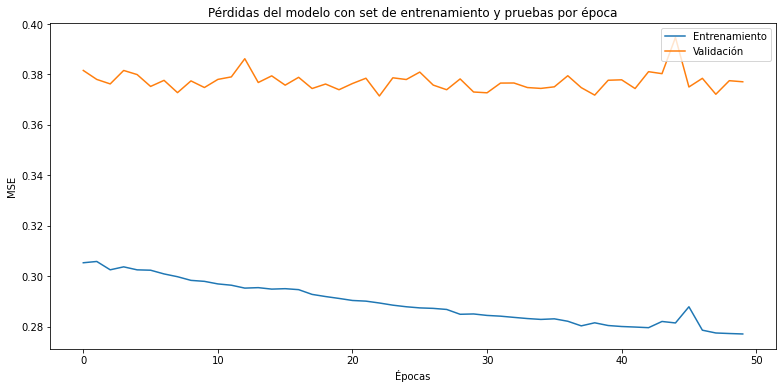

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

Trata de realizar predicciones con el modelo

In [ ]:
real=pd.DataFrame(y_train)
predic=model.predict(pd.DataFrame(x_train_scaled))
valores_reescalados = scaler1.inverse_transform(predic)
pred_escal =pd.DataFrame(valores_reescalados)
# Muestra los valores reales y las predicciones
for i in range(0,5):
	print("Real=%s, Prediccion=%s" % (real[0][i], pred_escal[0][i]))

Real=18650, Prediccion=17406.791
Real=9950, Prediccion=9760.529
Real=2000, Prediccion=3865.2964
Real=7999, Prediccion=4964.0054
Real=23999, Prediccion=22243.242
